In [412]:
import pandas as pd
from pandas import DataFrame, Series
import numpy as np
from IPython.display import display, HTML
#from openpyxl.workbook import Workbook
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import pickle

In [413]:
#directory = r"C:\Users\usrymr851lw223\PycharmProjects\zhulong\data\Melodie Run Data"
directory = r"C:\Users\usrymr851lw223\PycharmProjects\zhulong\zhulong"
filename = rf"{directory}\APO_timecourse.pkl"
#print(filename)
with open(filename,"rb") as experiment_file:
    experiments = pickle.load(experiment_file)

In [414]:
rows = []

for i,experiment in enumerate(experiments):
    
    # get parameters
    round = i+1
    solvent = experiment.solvent
    reagent = experiment.reagent.name
    additive = experiment.additive.abbreviation
    temperature = experiment.temperature
    stage = experiment.light_stage
    reagent_equiv = experiment.reagent_equivalents
    additive_mol = experiment.additive_mole_percent
    
    n_points = len(np.array(experiment.history["times"]))
    times = [0]
    times.extend([(i*2+2) for i in range(n_points)])
    times_string = str(times)
    values = [0]
    values.extend(np.array(experiment.history["values"]))
    values_string = str(values)
    
    # put all parameters in the current row
    rows.append([round, temperature, solvent, reagent, reagent_equiv, additive, additive_mol, stage, times, values])

# make dataframe

df = DataFrame(rows, columns=["round", "temperature", "solvent", "reagent", "reagent equiv", "additive", "additive mol%", "light stage", "times", "values"])
df.set_index("round",inplace=True)
display(df)

,temperature,solvent,reagent,reagent equiv,additive,additive mol%,light stage,times,values
round,,,,,,,,,
1,20,DMC,DBDMH,1.000,H2SO4,13.0,2,"[0, 2, 4, 6]","[0, 67.4741, 81.8419, 81.9339]"
2,35,MeCN,NBS,1.125,Water,19.0,2,"[0, 2, 4, 6, 8]","[0, 76.1625, 78.9165, 81.885, 81.9951]"
3,15,DMC,NBS,1.125,HCl,1.0,5,"[0, 2, 4, 6]","[0, 74.9264, 81.2868, 81.8445]"
4,20,MeCN,DBDMH,1.250,Phosphoric,19.0,3,"[0, 2, 4]","[0, 80.8618, 82.4044]"
5,25,DMC,DBDMH,1.375,Phenylphosphonic,25.0,4,"[0, 2, 4, 6]","[0, 82.5001, 80.3417, 80.2631]"
6,5,MeCN,NBS,1.250,Acetic,13.0,4,"[0, 2, 4, 6]","[0, 80.6779, 83.2924, 83.1455]"


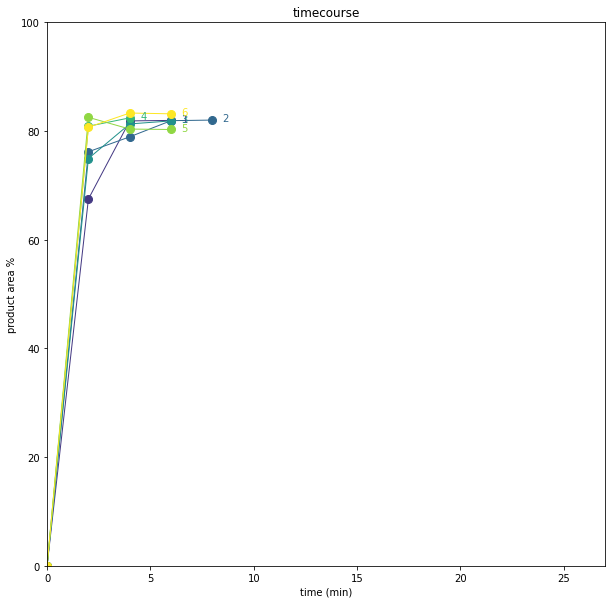

In [415]:
cmap = matplotlib.cm.get_cmap("viridis")
plt.figure(figsize=(10,10))
for round,row in df.iterrows():
    #print(round)
    #print(row)
    #print(row["times"])
    x = row["times"]
    y = row["values"]
    color = cmap(round/len(experiments))
    label = f"{round}, {row['solvent']}, {row['reagent']} {row['reagent equiv']:.1f} equiv, {row['additive']} {row['additive mol%']} mol%, {row['temperature']} C, stage {row['light stage']}"
    plt.plot(x,y,color=color,marker="o",linestyle="solid",linewidth=1,markersize=8,label=label)
    x0 = x[-1]+0.5
    y0 = y[-1]-0.25
    plt.annotate((round),(x0,y0),color=color)
plt.xlabel("time (min)")
plt.ylabel("product area %")
plt.title("timecourse")
plt.xlim(0,27)
plt.ylim(0,100)
#plt.legend(loc="upper right")
plt.show()

In [416]:
df.to_excel(rf"{directory}\dataframe.xlsx")